In [55]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
from keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

In [41]:
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

In [42]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [43]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [45]:
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

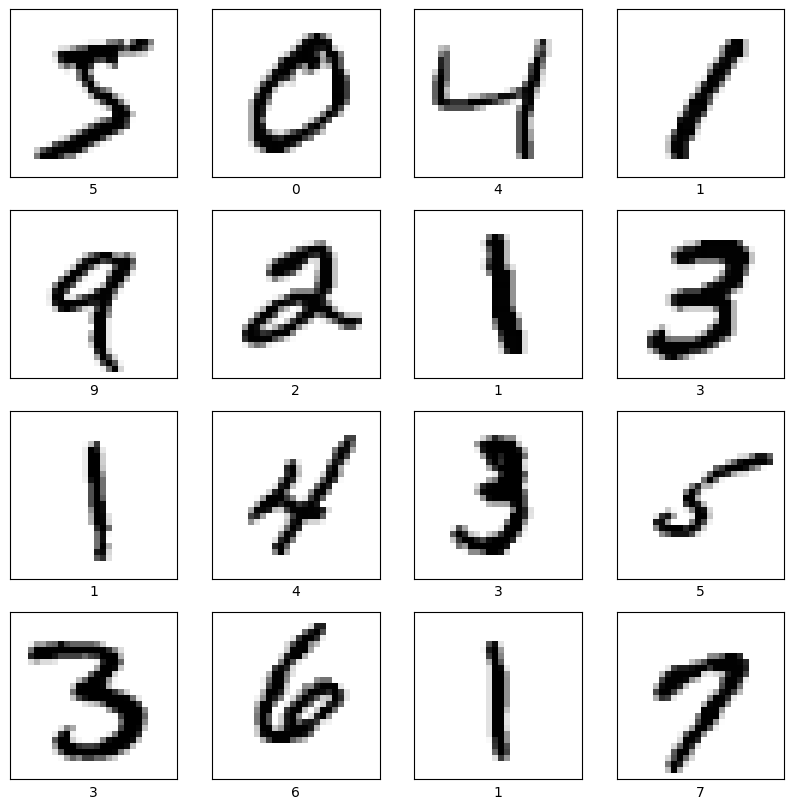

In [46]:
class_names = [str(i) for i in range(10)]
plt.figure(figsize=(10,10))
for i in range(16):
    plt.subplot(4, 4, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i].reshape(28, 28), cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [50]:
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1
)
datagen.fit(X_train)

In [54]:
model = Sequential()

# 1st Convolutional Layer
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 2nd Convolutional Layer
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Fully Connected Layer
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

# Output Layer
model.add(Dense(10, activation='softmax'))  # 10 output units for digits (0-9)

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 dropout_9 (Dropout)         (None, 13, 13, 32)        0         
                                                                 
 conv2d_10 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 dropout_10 (Dropout)        (None, 5, 5, 64)         

In [32]:
history = model.fit(datagen.flow(X_train, y_train, batch_size=32), epochs=15, validation_data=(X_test, y_test))

Epoch 1/15
1875/1875 [==============================] - 27s 14ms/step - loss: 0.4725 - accuracy: 0.8487 - val_loss: 0.0462 - val_accuracy: 0.9832
Epoch 2/15
1875/1875 [==============================] - 26s 14ms/step - loss: 0.2026 - accuracy: 0.9386 - val_loss: 0.0307 - val_accuracy: 0.9896
Epoch 3/15
1875/1875 [==============================] - 25s 14ms/step - loss: 0.1606 - accuracy: 0.9534 - val_loss: 0.0278 - val_accuracy: 0.9913
Epoch 4/15
1875/1875 [==============================] - 25s 14ms/step - loss: 0.1397 - accuracy: 0.9592 - val_loss: 0.0258 - val_accuracy: 0.9922
Epoch 5/15
1875/1875 [==============================] - 25s 13ms/step - loss: 0.1242 - accuracy: 0.9629 - val_loss: 0.0239 - val_accuracy: 0.9911
Epoch 6/15
1875/1875 [==============================] - 25s 14ms/step - loss: 0.1143 - accuracy: 0.9658 - val_loss: 0.0221 - val_accuracy: 0.9923
Epoch 7/15
1875/1875 [==============================] - 25s 13ms/step - loss: 0.1086 - accuracy: 0.9688 - val_loss: 0.0182 -

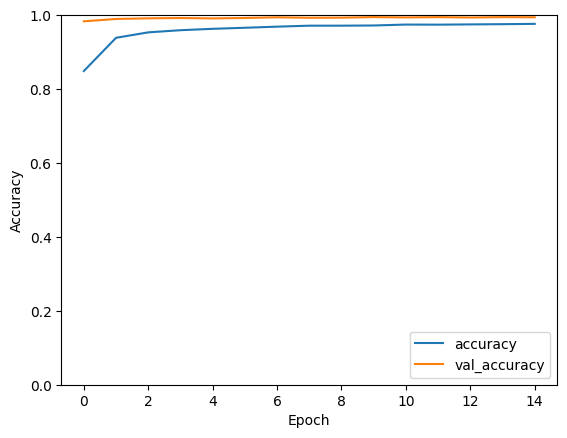

In [56]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

In [36]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_accuracy}')

313/313 [==============================] - 1s 3ms/step - loss: 0.0176 - accuracy: 0.9941
Test accuracy: 0.9940999746322632
